In [1]:
import sys
# MC: need to specify path to remo in notebook
sys.path.append('C:/Users/crows/Documents/GitHub/remo-python')

In [2]:
%load_ext autoreload
%autoreload 2
import remo

Launching Remo server ...
Wait a bit...  5
Remo server is running: {'version': '0.2.20-363-g9a7b4759'}


### List datasets

List all of the currently available datasets with their id and name.

In [3]:
my_datasets = remo.list_datasets() 
my_datasets

[Dataset 1 - 'dogs',
 Dataset 4 - 'dataset test: imagenet',
 Dataset 15 - 'sample open images 3',
 Dataset 100 - 'simple object detection',
 Dataset 101 - 'simple object detection',
 Dataset 102 - 'simple image classification',
 Dataset 103 - 'simple object detection',
 Dataset 104 - 'simple image classification',
 Dataset 105 - 'simple image classification',
 Dataset 106 - 'simple image classification',
 Dataset 107 - 'simple image classification',
 Dataset 108 - 'dataset test: sample 5',
 Dataset 109 - 'dataset test: sample 5',
 Dataset 110 - 'dataset test: sample 5',
 Dataset 111 - 'dataset test: sample 6',
 Dataset 112 - 'dataset 6 test: sample 6',
 Dataset 113 - 'simple object detection',
 Dataset 114 - 'open images classification',
 Dataset 115 - 'open images classification',
 Dataset 116 - 'open images detection',
 Dataset 117 - 'simple object detection',
 Dataset 118 - 'dataset test: imagenet',
 Dataset 119 - 'open images detection',
 Dataset 120 - 'dataset test: imagenet',
 Da

### Get a dataset

To get a remo dataset use the dataset id.

In [3]:
my_dataset = remo.get_dataset(1)
my_dataset

url http://localhost:8000/api/dataset/1/
b'{"id":1,"name":"dogs","annotation_sets":[1,69,71],"created_at":"2019-10-17T13:21:50.395708Z","license":null,"is_public":false,"users_shared":[],"top3_classes":[],"total_classes":0,"total_annotation_objects":16}'


Dataset 1 - 'dogs'

In [4]:
my_dataset_2 = remo.get_dataset(4)
my_dataset_2

Dataset 4 - 'dataset test: imagenet'

### Create dataset


If we would like to create a new dataset, we can link a url or a local dataset path. In the create_dataset() we can specify dataset name and annotation_task.

In [9]:
dataset = remo.create_dataset(name = 'open images detection',
                            paths_to_upload = ['open_images_sample_dataset'],
                            annotation_task=remo.task.object_detection)


Progress 100% - 11/11 - elapsed 0:00:04.001000 - speed: 2.75 img / s, ETA: 0:00:00


Now, if we list datasets we have:


In [11]:
remo.list_datasets() 

[Dataset 1 - 'dogs',
 Dataset 4 - 'dataset test: imagenet',
 Dataset 15 - 'sample open images 3',
 Dataset 95 - 'simple object detection',
 Dataset 96 - 'simple image classification',
 Dataset 97 - 'dataset test: sample 5',
 Dataset 98 - 'dataset test: sample 6']

### View Dataset

In [3]:
my_dataset.view()

Open http://localhost:8000/datasets/1


### Add data to your dataset

We can add more data to datasets to directly current dataset or using a dataset_id

In [10]:
dataset.add_data(paths_to_upload = ['open_images_sample_dataset'], annotation_task=remo.task.object_detection)

Progress 100% - 11/11 - elapsed 0:00:05.001000 - speed: 2.20 img / s, ETA: 0:00:00


{'files_upload_result': <generator object Executor.map.<locals>.result_iterator at 0x0000018B1541BB10>}

In [11]:
remo.add_data_to_dataset(dataset_id=1, paths_to_upload = ['dog1.jpg'])

{'files_upload_result': <generator object Executor.map.<locals>.result_iterator at 0x0000018B1541BC00>}

### List Annotations

You can list annotations sets of a dataset with dataset.annotation_sets() or you can pass a dataset id and use list_annotation_sets(dataset_id)

In [4]:
my_dataset.annotation_sets()


[Annotation set 1 - 'object_detection', task: Object detection, #classes: 3,
 Annotation set 69 - 'dog segmentation', task: Instance segmentation, #classes: 1,
 Annotation set 71 - 'dog classification', task: Image classification, #classes: 0]

In [5]:
remo.list_annotation_sets(dataset_id=1) 

[Annotation set 1 - 'object_detection', task: Object detection, #classes: 3,
 Annotation set 69 - 'dog segmentation', task: Instance segmentation, #classes: 1,
 Annotation set 71 - 'dog classification', task: Image classification, #classes: 0]

### View Annotation Tool

Given an annotation id of a dataset browse the annotation tool in Remo 

In [4]:
my_dataset.view_annotate(1) 

Open http://localhost:8000/annotation/1


### Annotation statistics 

In [9]:
dataset.annotation_statistics()

["Annotation set 64 - 'Object detection',  #images: 10, #classes: 18, #objects: 98, Top3 classes: [('Fruit', 27), ('Sports equipment', 12), ('Human arm', 10)], Released: None, Updated: 2019-11-06T14:54:02.245692Z "]

In [10]:
remo.annotation_statistics(dataset_id=88) 

["Annotation set 64 - 'Object detection',  #images: 10, #classes: 18, #objects: 98, Top3 classes: [('Fruit', 27), ('Sports equipment', 12), ('Human arm', 10)], Released: None, Updated: 2019-11-06T14:54:02.245692Z "]

### View Annotation Statistics

Browse annotation statistics card in Remo

In [11]:
dataset.view_annotation_statistics(64)

Open http://localhost:8000/annotation-detail/64/intro


### Get annotations

In [4]:
# TODO: convert into a dataset function
annotation_71_json = remo.get_annotations(annotation_set_id=71) 

In [5]:
annotation_71_json

[{'file_name': 'dog1.jpg',
  'height': 500,
  'width': 750,
  'tags': [],
  'task': 'Image classification',
  'classes': ['Dog']},
 {'file_name': 'dog2.jpg',
  'height': 700,
  'width': 1050,
  'tags': [],
  'task': 'Image classification',
  'classes': ['Dog']},
 {'file_name': 'dog3.jpg',
  'height': 500,
  'width': 375,
  'tags': [],
  'task': 'Image classification',
  'classes': ['Dog']},
 {'file_name': 'dog5.jpg',
  'height': 2105,
  'width': 3159,
  'tags': [],
  'task': 'Image classification',
  'classes': ['Dog', 'bicycle']},
 {'file_name': 'dog_bike1 (3).jpg',
  'height': 3024,
  'width': 4032,
  'tags': [],
  'task': 'Image classification',
  'classes': ['bicycle']},
 {'file_name': 'dog6.jpg',
  'height': 4519,
  'width': 3136,
  'tags': [],
  'task': 'Image classification',
  'classes': ['person', 'Dog']},
 {'file_name': 'dog4.jpg',
  'height': 5749,
  'width': 3833,
  'tags': [],
  'task': 'Image classification',
  'classes': ['person', 'Dog', 'bicycle']}]

In [8]:
annotation_1_json = remo.sdk.get_annotations(annotation_set_id=1) 

In [13]:
annotation_1_json[:3]

[{'file_name': 'dog1.jpg',
  'height': 500,
  'width': 750,
  'tags': [],
  'task': 'Object detection',
  'annotations': [{'classes': ['Dog'],
    'bbox': {'xmin': 339.0, 'ymin': 92.5, 'xmax': 629.0, 'ymax': 463.5}}]},
 {'file_name': 'dog2.jpg',
  'height': 700,
  'width': 1050,
  'tags': [],
  'task': 'Object detection',
  'annotations': [{'classes': ['Dog'],
    'bbox': {'xmin': 349.39526102868547,
     'ymin': 38.83665989956441,
     'xmax': 808.9844120741101,
     'ymax': 698.6561720729666}}]},
 {'file_name': 'dog3.jpg',
  'height': 500,
  'width': 375,
  'tags': [],
  'task': 'Object detection',
  'annotations': [{'classes': ['Dog'],
    'bbox': {'xmin': 63.0, 'ymin': 93.5, 'xmax': 281.0, 'ymax': 449.5}}]}]

In [5]:
annotation_1_segmentation = remo.sdk.get_annotations(annotation_set_id=69) 

In [14]:
annotation_1_segmentation[:3]

[{'file_name': 'dog1.jpg',
  'height': 500,
  'width': 750,
  'tags': [],
  'task': 'Instance segmentation',
  'annotations': [{'classes': ['Dog'],
    'segments': [{'x': 397, 'y': 121.5},
     {'x': 337, 'y': 146.5},
     {'x': 369, 'y': 198.5},
     {'x': 418, 'y': 191.5},
     {'x': 399, 'y': 235.5},
     {'x': 425, 'y': 262.5},
     {'x': 381, 'y': 318.5},
     {'x': 416, 'y': 442.5},
     {'x': 593, 'y': 392.5},
     {'x': 597, 'y': 334.5},
     {'x': 572, 'y': 241.5},
     {'x': 584, 'y': 131.5},
     {'x': 555, 'y': 94.5},
     {'x': 469, 'y': 122.5},
     {'x': 425, 'y': 138.5}]}]},
 {'file_name': 'dog2.jpg',
  'height': 700,
  'width': 1050,
  'tags': [],
  'task': 'Instance segmentation',
  'annotations': [{'classes': ['Dog'],
    'segments': [{'x': 572.0376372965667, 'y': 32.95434214860656},
     {'x': 435.2460283778225, 'y': 62.799784094514386},
     {'x': 392.9649856211197, 'y': 148.60542968899938},
     {'x': 339.49190213470155, 'y': 304.05043982393596},
     {'x': 421.56

In [4]:
annotation_69_coco = remo.get_annotations(annotation_set_id=69, annotation_format='coco') 

### Export annotations to csv

In [4]:
remo.export_annotation_to_csv(annotation_set_id=1, output_file='output1.csv', annotation_task=remo.task.object_detection)

Remo server is running: {'version': '0.2.20-334-gc682ef18'}


In [4]:
remo.export_annotation_to_csv(annotation_set_id=71, output_file='output71.csv', annotation_task=remo.task.image_classification)

In [5]:
import pandas as pd
df = pd.read_csv('output.csv')

In [6]:
df.head()

,file_name,class,xmin,ymin,xmax,ymax
0,dog1.jpg,Dog,339.000000,92.500000,629.000000,463.500000
1,dog2.jpg,Dog,349.395261,38.836660,808.984412,698.656172
2,dog3.jpg,Dog,63.000000,93.500000,281.000000,449.500000
3,dog5.jpg,Dog,860.750584,668.799162,2069.034267,1679.069800
4,dog_bike1 (3).jpg,bicycle,214.797456,827.260472,3860.548869,2655.941515


In [7]:
remo.export_annotation_to_csv(annotation_set_id=69, output_file='output2.csv', annotation_task=remo.task.instance_segmentation)

In [8]:
df2 = pd.read_csv('output2.csv')

In [9]:
df2.head()

,file_name,class,coordinates
0,dog1.jpg,Dog,397 121.5 337 146.5 369 198.5 418 191.5 399 23...
1,dog2.jpg,Dog,572.0376372965667 32.95434214860656 435.246028...
2,dog3.jpg,Dog,145 87.5 95 386.5 157 493.5 188 406.5 213 411....
3,dog5.jpg,Dog,1144.3062214653337 753.521907272107 927.411578...
4,dog6.jpg,Dog,1726.0347448223126 2966.371340520207 1766.1750...


### View search bar 

Browse the search bar in Remo

In [10]:
remo.view_search()

Open http://localhost:8000/datasets/filtered/images


### Search images by class and task

In [6]:
dogs = remo.search_images(['Dog'], task_list=[remo.task.instance_segmentation, remo.task.object_detection])

In [7]:
dogs

[{'image_id': 1,
  'dataset_id': 1,
  'name': 'dog1.jpg',
  'preview': '/media/dataset_previews/baf1267e883c9e34bad719a192954931',
  'annotations': {'coordinates': [[{'x': 397, 'y': 121.5},
     {'x': 337, 'y': 146.5},
     {'x': 369, 'y': 198.5},
     {'x': 418, 'y': 191.5},
     {'x': 399, 'y': 235.5},
     {'x': 425, 'y': 262.5},
     {'x': 381, 'y': 318.5},
     {'x': 416, 'y': 442.5},
     {'x': 593, 'y': 392.5},
     {'x': 597, 'y': 334.5},
     {'x': 572, 'y': 241.5},
     {'x': 584, 'y': 131.5},
     {'x': 555, 'y': 94.5},
     {'x': 469, 'y': 122.5},
     {'x': 425, 'y': 138.5}]],
   'classes': ['Dog']},
  'dimensions': [750, 500]},
 {'image_id': 2,
  'dataset_id': 1,
  'name': 'dog2.jpg',
  'preview': '/media/dataset_previews/ff3b449adc2c24ea5be344060640ef40',
  'annotations': {'coordinates': [[{'x': 572.0376372965667,
      'y': 32.95434214860656},
     {'x': 435.2460283778225, 'y': 62.799784094514386},
     {'x': 392.9649856211197, 'y': 148.60542968899938},
     {'x': 339.4

### List images in a dataset, each with its own class

In [15]:
my_dataset.list_images()

[{'name': 'dog1.jpg', 'id': 1},
 {'name': 'dog2.jpg', 'id': 2},
 {'name': 'dog3.jpg', 'id': 3},
 {'name': 'dog5.jpg', 'id': 4},
 {'name': 'dog_bike1 (3).jpg', 'id': 5},
 {'name': 'dog6.jpg', 'id': 6},
 {'name': 'dog4.jpg', 'id': 7}]

### View images

In [13]:
dataset.view_image(1716)

Open http://localhost:8000/image/1716?datasetId=93


In [8]:
my_dataset.view_image(1716)

Image ID: 1716 not in dataset 1


In [10]:
remo.view_image(2,1)

Open http://localhost:8000/image/2?datasetId=1


### Plot Images

We can get and plot images using directly through dataset.get_images(image_id) 

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 

result = my_dataset.get_images(1)
img = Image.open(result)
img = img.save("img.jpg") 

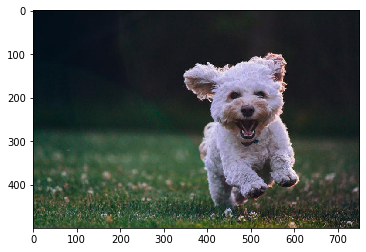

In [4]:
image = plt.imread('img.jpg')
fig, ax = plt.subplots()
im = ax.imshow(image)
plt.show()

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 
result = dataset.get_images(image_id=1536)
img = Image.open(result)
img = img.save("img2.jpg") 

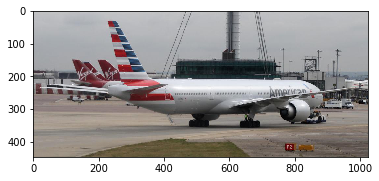

In [17]:
image = plt.imread('img2.jpg')
fig, ax = plt.subplots()
im = ax.imshow(image)
plt.show()